# Forecasting for 2022 to 2026

In [1]:
import pandas as pd
import numpy as np
import darts

In [16]:
df = pd.read_csv('Inner.csv', header=0, parse_dates=True)
df0 = pd.read_csv('Inner.csv', header=0, parse_dates=True)
df

,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,P_CODE,YEAR_CODE,VISIT_NO,REPORT_YEAR,SAMPLE_DATE,SAMPLE_YEAR,SAMPLE_MONTH,REEF_YEAR_CODE_ID,TEMPERATURE,TEMPERATURE_YEAR_AVE,MEDIAN_LIVE_CORAL,MEDIAN_SOFT_CORAL,MEDIAN_DEAD_CORAL,MEAN_LIVE_CORAL,MEAN_SOFT_CORAL,MEAN_DEAD_CORAL,TOTAL_COTS,TOWS,MEAN_COTS_PER_TOW,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
0,16028S,CA,I,LOW ISLANDS REEF,-16.383333,145.566667,RM,199293,1,1993,11/06/1993,1993,6,16028S199293,26.2,28.8,20.00,0.0,5.0,25.758,0.000,2.576,0,33,0.000,0,0.000000,1,-16.383517,145.570950,12/06/1993,30.64,24.77,17.82,26.78
1,16028S,CA,I,LOW ISLANDS REEF,-16.383333,145.566667,RM,199293,1,1993,11/06/1993,1993,6,16028S199293,26.2,28.8,20.00,0.0,5.0,25.758,0.000,2.576,0,33,0.000,0,0.000000,2,-16.386483,145.572600,12/06/1993,35.83,29.91,13.09,21.17
2,16028S,CA,I,LOW ISLANDS REEF,-16.383333,145.566667,RM,199293,1,1993,11/06/1993,1993,6,16028S199293,26.2,28.8,20.00,0.0,5.0,25.758,0.000,2.576,0,33,0.000,0,0.000000,3,-16.390217,145.573450,12/06/1993,37.57,35.81,11.20,15.42
3,11049S,CG,M,11049S,-11.358333,143.333333,RM,201819,27,2019,24/01/2019,2019,1,11049S201819,31.3,30.0,2.50,2.5,0.0,4.122,2.230,0.946,1,37,0.027,13,0.351351,1,-11.354533,143.332750,27/01/2019,58.32,14.44,1.03,26.22
4,11049S,CG,M,11049S,-11.358333,143.333333,RM,201819,27,2019,24/01/2019,2019,1,11049S201819,31.3,30.0,2.50,2.5,0.0,4.122,2.230,0.946,1,37,0.027,13,0.351351,2,-11.355700,143.335783,28/01/2019,60.02,14.63,1.40,23.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,19209S,WH,O,REBE REEF,-19.808333,150.150000,RM,201819,27,2019,27/04/2019,2019,4,19209S201819,28.6,26.2,25.00,2.5,0.0,35.188,7.313,0.625,0,40,0.000,21,0.525000,2,-19.797350,150.163067,27/04/2019,76.93,11.65,5.39,6.04
3756,19209S,WH,O,REBE REEF,-19.808333,150.150000,RM,201819,27,2019,27/04/2019,2019,4,19209S201819,28.6,26.2,25.00,2.5,0.0,35.188,7.313,0.625,0,40,0.000,21,0.525000,3,-19.800517,150.162350,26/04/2019,76.63,12.72,4.96,5.69
3757,19209S,WH,O,REBE REEF,-19.808333,150.150000,RM,202021,29,2021,7/02/2021,2021,2,19209S202021,29.4,26.6,56.25,2.5,2.5,58.857,7.214,1.286,0,35,0.000,10,0.285714,1,-19.791917,150.161250,7/02/2021,35.74,55.11,7.17,1.99
3758,19209S,WH,O,REBE REEF,-19.808333,150.150000,RM,202021,29,2021,7/02/2021,2021,2,19209S202021,29.4,26.6,56.25,2.5,2.5,58.857,7.214,1.286,0,35,0.000,10,0.285714,2,-19.797350,150.163067,7/02/2021,62.79,21.32,11.22,4.67


In [ ]:
# Identify the data types of the columns in the data frame
print(df.dtypes)

# Identifying missing values
df.isnull().sum() # No missing values!

# The number of unique values for the first 13 columns in the data frame
df.iloc[:,0:13].nunique()

# The count of each unique value in SAMPLE_MONTH
df['SAMPLE_MONTH'].value_counts()

In [50]:
# sort along SAMPLE_YEAR from smallest to largest
df_year_sorted = df.sort_values(by='REPORT_YEAR')

# The count of each unique value in SAMPLE_YEAR
REPORT_YEAR_value_counts = df['REPORT_YEAR'].value_counts()
print(REPORT_YEAR_value_counts)

# Print REPORT_YEAR_value_counts in order of years from smallest to largest
# print(REPORT_YEAR_value_counts.sort_index())

# Print the mean and median of REPORT_YEAR_value_counts
print(REPORT_YEAR_value_counts.mean())
print(REPORT_YEAR_value_counts.median())

# The number of unique values for each REEF_ID. 
REEF_ID_value_counts = df['REEF_ID'].value_counts()
print(REEF_ID_value_counts)

2020    180
2006    159
2021    158
2010    153
2008    147
2018    147
2012    144
2014    144
2016    141
2017    138
1998    132
1999    132
1996    132
2000    129
2019    129
2003    129
2002    126
2004    126
1997    126
2013    126
2005    123
2001    123
1995    123
2007    119
2009    108
2015    105
2011    102
1994     81
1993     78
Name: REPORT_YEAR, dtype: int64
129.6551724137931
129.0
28    180
14    159
29    158
18    153
16    147
26    147
20    144
22    144
24    141
25    138
6     132
7     132
4     132
8     129
27    129
11    129
10    126
12    126
5     126
21    126
13    123
9     123
3     123
15    119
17    108
23    105
19    102
2      81
1      78
Name: VISIT_NO, dtype: int64
18032S    84
15099C    84
22102S    84
18086S    81
23048S    81
          ..
11049S     9
18091S     6
11016S     6
11029S     6
11162S     6
Name: REEF_ID, Length: 101, dtype: int64


## Creating the Dataframes for each REEF_ID and SITE_ID

In [76]:
# Create a list of dataframes grouped by REEF_ID, where each element in the list is the dataframe for a particular REEF_ID
REEF_ID_LIST = [group[1] for group in df.groupby('REEF_ID')]
REEF_ID_LIST[1]
# print("Length ", len(REEF_ID_LIST))

# The number of rows in each element of df_list, stored in a list
# print("Length of each data frame in REEF_ID_LIST:\n", [len(df) for df in REEF_ID_LIST])

# Number of rows of each dataframe the list of REEF_ID dataframes, from smallest to largest
# len_REEF_ID_LIST_sorted = [REEF_ID_LIST[i] for i in np.argsort([len(df) for df in REEF_ID_LIST])]
# print("Sorted number of rows of each REEF_ID dataframe:\n", [len(df) for df in len_REEF_ID_LIST_sorted])


,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,P_CODE,YEAR_CODE,VISIT_NO,REPORT_YEAR,...,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
1560,11029S,CG,M,MONSOON REEF,-11.133333,143.258333,RMRAP,201920,28,2020,...,2,0.083333,1,-11.126433,143.261483,24/11/2019,57.79,15.95,0.90,25.36
1561,11029S,CG,M,MONSOON REEF,-11.133333,143.258333,RMRAP,201920,28,2020,...,2,0.083333,2,-11.127283,143.264683,25/11/2019,64.62,6.95,2.03,26.40
1562,11029S,CG,M,MONSOON REEF,-11.133333,143.258333,RMRAP,201920,28,2020,...,2,0.083333,3,-11.129267,143.267667,25/11/2019,65.67,10.91,1.25,22.17
1563,11029S,CG,M,MONSOON REEF,-11.133333,143.258333,RM,202021,29,2021,...,4,0.142857,1,-11.126433,143.261483,11/12/2020,52.57,21.43,0.69,25.30
1564,11029S,CG,M,MONSOON REEF,-11.133333,143.258333,RM,202021,29,2021,...,4,0.142857,2,-11.127283,143.264683,11/12/2020,66.73,12.19,2.28,18.80
1565,11029S,CG,M,MONSOON REEF,-11.133333,143.258333,RM,202021,29,2021,...,4,0.142857,3,-11.129267,143.267667,11/12/2020,67.66,20.44,2.38,9.51


In [3]:
# Assuming df is your original dataframe
grouped = df.groupby(['REEF_ID', 'SITE_NO'])

# Create a list of dataframes, resetting the index for each one. Print the length of the list.
df_list = [group.reset_index() for _, group in grouped]
print("Length of df_list:", len(df_list))

# Sort the dataframe list by the length of the dataframes, then print the lengths
df_list_sorted = [df_list[i] for i in np.argsort([len(df) for df in df_list])]
print("Sorted length of each dataframe in df_list:\n", [len(df) for df in df_list_sorted])

Length of df_list: 303
Sorted length of each dataframe in df_list:
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 25, 25,

In [208]:
# Set the print options to display all columns
pd.set_option('display.max_columns', None)

print(df_list_sorted[0])

   index REEF_ID SECTOR SHELF       REEF_NAME  LATITUDE  LONGITUDE P_CODE  \
0   1554  11016S     CG     M  MCSWEENEY REEF   -11.025     143.25  RMRAP   
1   1557  11016S     CG     M  MCSWEENEY REEF   -11.025     143.25     RM   

   YEAR_CODE  VISIT_NO  REPORT_YEAR SAMPLE_DATE  SAMPLE_YEAR  SAMPLE_MONTH  \
0     201920        28         2020  23/11/2019         2019            11   
1     202021        29         2021  12/12/2020         2020            12   

  REEF_YEAR_CODE_ID  TEMPERATURE  TEMPERATURE_YEAR_AVE  MEDIAN_LIVE_CORAL  \
0      11016S201920         31.4                  30.0                2.5   
1      11016S202021         32.6                  30.5                2.5   

   MEDIAN_SOFT_CORAL  MEDIAN_DEAD_CORAL  MEAN_LIVE_CORAL  MEAN_SOFT_CORAL  \
0                2.5                0.0            2.845            2.414   
1                2.5                0.0            5.625            2.292   

   MEAN_DEAD_CORAL  TOTAL_COTS  TOWS  MEAN_COTS_PER_TOW  TOTAL_TROUT 

In [4]:
import pandas as pd

# Create a DataFrame with all years from 1993 to 2021
years_df = pd.DataFrame({'REPORT_YEAR': range(1993, 2027)})

# Create a DataFrame with all unique combinations of 'REEF_ID', 'SECTOR', 'SHELF', 'REEF_NAME', 'LATITUDE', 'LONGITUDE', 'P_CODE', 'SITE_NO', 'SITE_LATITUDE', and 'SITE_LONGITUDE'
unique_combinations_df = df[['REEF_ID', 'SECTOR', 'SHELF', 'REEF_NAME', 'LATITUDE', 'LONGITUDE', 'SITE_NO', 'SITE_LATITUDE', 'SITE_LONGITUDE']].drop_duplicates()

# Create a new DataFrame that contains all combinations of 'REEF_ID', 'SECTOR', 'SHELF', 'REEF_NAME', 'LATITUDE', 'LONGITUDE', 'P_CODE', 'SITE_NO', 'SITE_LATITUDE', 'SITE_LONGITUDE', and 'REPORT_YEAR'
full_df = pd.merge(unique_combinations_df.assign(key=0), years_df.assign(key=0), on='key').drop('key', axis=1)

# For each DataFrame in df_list, merge it with full_df to add the missing years
df_list_extended = [pd.merge(full_df, df, on=['REEF_ID', 'SECTOR', 'SHELF', 'REEF_NAME', 'LATITUDE', 'LONGITUDE', 'SITE_NO', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'REPORT_YEAR'], how='left') for df in df_list]


In [5]:
# For each DataFrame in df_list, merge it with the relevant subset of full_df to add the missing years
df_list_extended = [pd.merge(full_df[(full_df['REEF_ID'] == df['REEF_ID'].iloc[0]) & (full_df['SITE_NO'] == df['SITE_NO'].iloc[0])], df, on=['REEF_ID', 'SECTOR', 'SHELF', 'REEF_NAME', 'LATITUDE', 'LONGITUDE', 'SITE_NO', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'REPORT_YEAR'], how='left') for df in df_list]

In [6]:
df_list_extended[0]

,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,REPORT_YEAR,...,TOTAL_COTS,TOWS,MEAN_COTS_PER_TOW,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
0,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_list_extended_lengths = []
for df_i in df_list_extended:
    df_list_extended_lengths.append(len(df_i))
print(df_list_extended_lengths)

[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,

In [15]:
# In this section, I figure out the value distributions for the following attributes: P_CODE	YEAR_CODE	VISIT_NO	SAMPLE_DATE	SAMPLE_YEAR	SAMPLE_MONTH    SITE_SAMPLE_DATE.

# Set default print options to display all columns
pd.set_option('display.max_columns', None)

# print value counts for P_CODE
P_CODE_value_counts = df['P_CODE'].value_counts()
print("\nP_CODE value counts", P_CODE_value_counts)

# print value counts for YEAR_CODE
YEAR_CODE_value_counts = df['YEAR_CODE'].value_counts()
print("\nYEAR_CODE value counts", YEAR_CODE_value_counts)

# The values for VISIT_NO start at 1 for 1993 and increase by 1 each year until 2027. Generate the template list of values here.
VISIT_NO_template = [i for i in range(1, 35)]
print("\nVISIT_NO_template:", VISIT_NO_template, len(VISIT_NO_template))

# print value counts for SAMPLE_DATE, ignoring the day but including the year and month. Convert values in the current format of strings like "8/04/1992" (Day/Month/Year) into date format first.
df['SAMPLE_DATE'] = pd.to_datetime(df['SAMPLE_DATE'], format='%d/%m/%Y')
SAMPLE_DATE_value_counts = df['SAMPLE_DATE'].dt.strftime('%Y-%m').value_counts()
print("\nSAMPLE_DATE value counts", SAMPLE_DATE_value_counts)

# print value counts for SAMPLE_YEAR. Convert year string values into integers first.
df['SAMPLE_YEAR'] = df['SAMPLE_YEAR'].astype(int)
SAMPLE_YEAR_value_counts = df['SAMPLE_YEAR'].value_counts()
print("\nSAMPLE_YEAR value counts", SAMPLE_YEAR_value_counts)

# print value counts for SAMPLE_MONTH. Convert month string values into integers first.
df['SAMPLE_MONTH'] = df['SAMPLE_MONTH'].astype(int)
SAMPLE_MONTH_value_counts = df['SAMPLE_MONTH'].value_counts()
print("\nSAMPLE_MONTH value counts", SAMPLE_MONTH_value_counts)

# print value counts for SITE_SAMPLE_DATE, ignoring the day but including the year and month. Convert values in the current format of strings like "8/04/1992" (Day/Month/Year) into date format first.
df['SITE_SAMPLE_DATE'] = pd.to_datetime(df['SITE_SAMPLE_DATE'], format='%d/%m/%Y')
SITE_SAMPLE_DATE_value_counts = df['SITE_SAMPLE_DATE'].dt.strftime('%Y-%m').value_counts()
print("\nSITE_SAMPLE_DATE value counts", SITE_SAMPLE_DATE_value_counts)


P_CODE value counts RM       20
RAP      11
RMRAP     3
Name: P_CODE, dtype: int64

YEAR_CODE value counts 201920.0    1
202021.0    1
Name: YEAR_CODE, dtype: int64

VISIT_NO_template: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34] 34

SAMPLE_DATE value counts 2019-11    1
2020-12    1
Name: SAMPLE_DATE, dtype: int64

SAMPLE_YEAR value counts 2019    2
1993    1
2010    1
2025    1
2024    1
2023    1
2022    1
2020    1
2018    1
2017    1
2016    1
2015    1
2014    1
2013    1
2012    1
2011    1
2009    1
1994    1
2008    1
2007    1
2006    1
2005    1
2004    1
2003    1
2002    1
2001    1
2000    1
1999    1
1998    1
1997    1
1996    1
1995    1
2026    1
Name: SAMPLE_YEAR, dtype: int64

SAMPLE_MONTH value counts 11    5
1     4
9     4
12    4
8     3
3     3
4     3
5     3
2     2
10    1
6     1
7     1
Name: SAMPLE_MONTH, dtype: int64

SITE_SAMPLE_DATE value counts 2019-11    1
2020-12    

In [18]:
df

,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,P_CODE,YEAR_CODE,VISIT_NO,REPORT_YEAR,SAMPLE_DATE,SAMPLE_YEAR,SAMPLE_MONTH,REEF_YEAR_CODE_ID,TEMPERATURE,TEMPERATURE_YEAR_AVE,MEDIAN_LIVE_CORAL,MEDIAN_SOFT_CORAL,MEDIAN_DEAD_CORAL,MEAN_LIVE_CORAL,MEAN_SOFT_CORAL,MEAN_DEAD_CORAL,TOTAL_COTS,TOWS,MEAN_COTS_PER_TOW,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
0,16028S,CA,I,LOW ISLANDS REEF,-16.383333,145.566667,RM,199293,1,1993,11/06/1993,1993,6,16028S199293,26.2,28.8,20.00,0.0,5.0,25.758,0.000,2.576,0,33,0.000,0,0.000000,1,-16.383517,145.570950,12/06/1993,30.64,24.77,17.82,26.78
1,16028S,CA,I,LOW ISLANDS REEF,-16.383333,145.566667,RM,199293,1,1993,11/06/1993,1993,6,16028S199293,26.2,28.8,20.00,0.0,5.0,25.758,0.000,2.576,0,33,0.000,0,0.000000,2,-16.386483,145.572600,12/06/1993,35.83,29.91,13.09,21.17
2,16028S,CA,I,LOW ISLANDS REEF,-16.383333,145.566667,RM,199293,1,1993,11/06/1993,1993,6,16028S199293,26.2,28.8,20.00,0.0,5.0,25.758,0.000,2.576,0,33,0.000,0,0.000000,3,-16.390217,145.573450,12/06/1993,37.57,35.81,11.20,15.42
3,11049S,CG,M,11049S,-11.358333,143.333333,RM,201819,27,2019,24/01/2019,2019,1,11049S201819,31.3,30.0,2.50,2.5,0.0,4.122,2.230,0.946,1,37,0.027,13,0.351351,1,-11.354533,143.332750,27/01/2019,58.32,14.44,1.03,26.22
4,11049S,CG,M,11049S,-11.358333,143.333333,RM,201819,27,2019,24/01/2019,2019,1,11049S201819,31.3,30.0,2.50,2.5,0.0,4.122,2.230,0.946,1,37,0.027,13,0.351351,2,-11.355700,143.335783,28/01/2019,60.02,14.63,1.40,23.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,19209S,WH,O,REBE REEF,-19.808333,150.150000,RM,201819,27,2019,27/04/2019,2019,4,19209S201819,28.6,26.2,25.00,2.5,0.0,35.188,7.313,0.625,0,40,0.000,21,0.525000,2,-19.797350,150.163067,27/04/2019,76.93,11.65,5.39,6.04
3756,19209S,WH,O,REBE REEF,-19.808333,150.150000,RM,201819,27,2019,27/04/2019,2019,4,19209S201819,28.6,26.2,25.00,2.5,0.0,35.188,7.313,0.625,0,40,0.000,21,0.525000,3,-19.800517,150.162350,26/04/2019,76.63,12.72,4.96,5.69
3757,19209S,WH,O,REBE REEF,-19.808333,150.150000,RM,202021,29,2021,7/02/2021,2021,2,19209S202021,29.4,26.6,56.25,2.5,2.5,58.857,7.214,1.286,0,35,0.000,10,0.285714,1,-19.791917,150.161250,7/02/2021,35.74,55.11,7.17,1.99
3758,19209S,WH,O,REBE REEF,-19.808333,150.150000,RM,202021,29,2021,7/02/2021,2021,2,19209S202021,29.4,26.6,56.25,2.5,2.5,58.857,7.214,1.286,0,35,0.000,10,0.285714,2,-19.797350,150.163067,7/02/2021,62.79,21.32,11.22,4.67


In [24]:
import numpy as np

# First, we define the probability distribution for 'P_CODE' and 'SAMPLE_MONTH'
P_CODE_prob = P_CODE_value_counts / P_CODE_value_counts.sum()
SAMPLE_MONTH_prob = SAMPLE_MONTH_value_counts / SAMPLE_MONTH_value_counts.sum()

# # Create a new separate dataframe for SAMPLE_SEPARATE_DAY, which is the day of the month that the sample was taken. Convert day string values into integers first. It should be in a few dataframe called df_SAMPLE_SEPARATE_DAY.
time = pd.to_datetime(df['SAMPLE_DATE'], format='%d/%m/%Y')
print(time)
df_SAMPLE_SEPARATE_DAY = pd.to_datetime(df['SAMPLE_DATE'], format='%d/%m/%Y').dt.strftime('%d').astype(int)

# # define a probability distribution for SAMPLE_SEPARATE_DAY
SAMPLE_SEPARATE_DAY_prob = df_SAMPLE_SEPARATE_DAY.value_counts() / df_SAMPLE_SEPARATE_DAY.value_counts().sum()



# Then, we loop through each dataframe in df_list_extended
for df in df_list_extended:
    # Fill 'P_CODE' with a random sample from the existing distribution
    df.loc[df['P_CODE'].isnull(), 'P_CODE'] = np.random.choice(P_CODE_prob.index, size=df['P_CODE'].isnull().sum(), p=P_CODE_prob.values)
    
    # Fill 'SAMPLE_YEAR' with 'REPORT_YEAR'
    df.loc[df['SAMPLE_YEAR'].isnull(), 'SAMPLE_YEAR'] = df['REPORT_YEAR']
    
    # Fill 'SAMPLE_MONTH' with a random sample from the existing distribution
    df.loc[df['SAMPLE_MONTH'].isnull(), 'SAMPLE_MONTH'] = np.random.choice(SAMPLE_MONTH_prob.index, size=df['SAMPLE_MONTH'].isnull().sum(), p=SAMPLE_MONTH_prob.values)

    # Generate 'SAMPLE_DATE' from 'SAMPLE_YEAR', 'SAMPLE_MONTH', and a randomly sampled day.
    # Ensure the size of the randomly sampled days matches the number of null 'SAMPLE_DATE' rows.
    null_sample_date_count = df['SAMPLE_DATE'].count() + df['SAMPLE_DATE'].isnull().sum()
    random_days = np.random.choice(SAMPLE_SEPARATE_DAY_prob.index, size=null_sample_date_count, p=SAMPLE_SEPARATE_DAY_prob.values)

    # Convert 'SAMPLE_YEAR', 'SAMPLE_MONTH' and 'random_days' to integers
    df['SAMPLE_YEAR'] = df['SAMPLE_YEAR'].astype(int)
    df['SAMPLE_MONTH'] = df['SAMPLE_MONTH'].astype(int)
    random_days = pd.Series(random_days).astype(int)

    # Generate 'SAMPLE_DATE' from 'SAMPLE_YEAR', 'SAMPLE_MONTH', and 'random_days'
    df.loc[df['SAMPLE_DATE'].isnull(), 'SAMPLE_DATE'] = pd.to_datetime(df['SAMPLE_YEAR'].astype(str) + '-' + df['SAMPLE_MONTH'].astype(str).str.zfill(2) + '-' + random_days.astype(str).str.zfill(2), errors='coerce')
    
    # Copy 'SAMPLE_DATE' to 'SITE_SAMPLE_DATE'
    df.loc[df['SITE_SAMPLE_DATE'].isnull(), 'SITE_SAMPLE_DATE'] = df['SAMPLE_DATE']

    # Generate 'VISIT_NO' from 'SAMPLE_YEAR'
    df.loc[df['VISIT_NO'].isnull(), 'VISIT_NO'] = df['SAMPLE_YEAR'] - df['SAMPLE_YEAR'].min() + 1

    # Generate 'YEAR_CODE' from REPORT_YEAR where YEAR_CODE = (REPORT_YEAR-1)*100 + REPORT_YEAR
    df.loc[df['YEAR_CODE'].isnull(), 'YEAR_CODE'] = (df['REPORT_YEAR'] - 1) * 100 + df['REPORT_YEAR']



0      1993-06-11
1      1993-06-11
2      1993-06-11
3      2019-01-24
4      2019-01-24
          ...    
3755   2019-04-27
3756   2019-04-27
3757   2021-02-07
3758   2021-02-07
3759   2021-02-07
Name: SAMPLE_DATE, Length: 3760, dtype: datetime64[ns]


In [25]:
df_list_extended[0]


,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,REPORT_YEAR,index,P_CODE,YEAR_CODE,VISIT_NO,SAMPLE_DATE,SAMPLE_YEAR,SAMPLE_MONTH,REEF_YEAR_CODE_ID,TEMPERATURE,TEMPERATURE_YEAR_AVE,MEDIAN_LIVE_CORAL,MEDIAN_SOFT_CORAL,MEDIAN_DEAD_CORAL,MEAN_LIVE_CORAL,MEAN_SOFT_CORAL,MEAN_DEAD_CORAL,TOTAL_COTS,TOWS,MEAN_COTS_PER_TOW,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
0,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1993,NaN,RM,201193.0,1.0,1993-08-23,1993,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-08-23,NaN,NaN,NaN,NaN
1,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1994,NaN,RAP,201294.0,2.0,1994-03-08,1994,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-03-08,NaN,NaN,NaN,NaN
2,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1995,NaN,RM,201395.0,3.0,1995-01-24,1995,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-01-24,NaN,NaN,NaN,NaN
3,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1996,NaN,RAP,201496.0,4.0,1996-11-27,1996,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-11-27,NaN,NaN,NaN,NaN
4,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1997,NaN,RM,201597.0,5.0,1997-09-21,1997,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-09-21,NaN,NaN,NaN,NaN
5,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1998,NaN,RM,201698.0,6.0,1998-10-12,1998,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-10-12,NaN,NaN,NaN,NaN
6,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1999,NaN,RMRAP,201799.0,7.0,1999-01-14,1999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-14,NaN,NaN,NaN,NaN
7,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2000,NaN,RM,201900.0,8.0,2000-08-04,2000,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-08-04,NaN,NaN,NaN,NaN
8,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2001,NaN,RM,202001.0,9.0,2001-01-23,2001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-23,NaN,NaN,NaN,NaN
9,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2002,NaN,RM,202102.0,10.0,2002-06-12,2002,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-06-12,NaN,NaN,NaN,NaN


In [26]:
for df in df_list_extended:
    # Find rows with NaT in 'SAMPLE_DATE'
    nat_rows = pd.isna(df['SAMPLE_DATE'])
    
    if nat_rows.sum() > 0:
        # If there are any NaT rows, generate random days between 1 and 28
        random_days = np.random.randint(1, 29, size=nat_rows.sum())

        # Construct new dates with the correct year and month, and random day
        new_dates = pd.to_datetime(df.loc[nat_rows, 'SAMPLE_YEAR'].astype(str) + '-' + df.loc[nat_rows, 'SAMPLE_MONTH'].astype(str).str.zfill(2) + '-' + pd.Series(random_days).astype(str).str.zfill(2))
        
        # Replace NaT values with these new dates
        df.loc[nat_rows, 'SAMPLE_DATE'] = new_dates

        # Also replace NaT values in 'SITE_SAMPLE_DATE' with the same new dates
        df.loc[pd.isna(df['SITE_SAMPLE_DATE']), 'SITE_SAMPLE_DATE'] = new_dates


In [27]:
df_list_extended[0]

,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,REPORT_YEAR,index,P_CODE,YEAR_CODE,VISIT_NO,SAMPLE_DATE,SAMPLE_YEAR,SAMPLE_MONTH,REEF_YEAR_CODE_ID,TEMPERATURE,TEMPERATURE_YEAR_AVE,MEDIAN_LIVE_CORAL,MEDIAN_SOFT_CORAL,MEDIAN_DEAD_CORAL,MEAN_LIVE_CORAL,MEAN_SOFT_CORAL,MEAN_DEAD_CORAL,TOTAL_COTS,TOWS,MEAN_COTS_PER_TOW,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
0,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1993,NaN,RM,201193.0,1.0,1993-08-23,1993,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-08-23,NaN,NaN,NaN,NaN
1,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1994,NaN,RAP,201294.0,2.0,1994-03-08,1994,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-03-08,NaN,NaN,NaN,NaN
2,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1995,NaN,RM,201395.0,3.0,1995-01-24,1995,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-01-24,NaN,NaN,NaN,NaN
3,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1996,NaN,RAP,201496.0,4.0,1996-11-27,1996,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-11-27,NaN,NaN,NaN,NaN
4,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1997,NaN,RM,201597.0,5.0,1997-09-21,1997,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-09-21,NaN,NaN,NaN,NaN
5,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1998,NaN,RM,201698.0,6.0,1998-10-12,1998,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-10-12,NaN,NaN,NaN,NaN
6,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,1999,NaN,RMRAP,201799.0,7.0,1999-01-14,1999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-14,NaN,NaN,NaN,NaN
7,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2000,NaN,RM,201900.0,8.0,2000-08-04,2000,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-08-04,NaN,NaN,NaN,NaN
8,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2001,NaN,RM,202001.0,9.0,2001-01-23,2001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-23,NaN,NaN,NaN,NaN
9,11016S,CG,M,MCSWEENEY REEF,-11.025,143.25,1,-11.019933,143.25005,2002,NaN,RM,202102.0,10.0,2002-06-12,2002,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-06-12,NaN,NaN,NaN,NaN


In [234]:
for df in df_list_extended:
    # Drop the columns 'index' and 'REEF_YEAR_CODE_ID'
    if 'index' in df.columns:
        df.drop('index', axis=1, inplace=True)
    if 'REEF_YEAR_CODE_ID' in df.columns:
        df.drop('REEF_YEAR_CODE_ID', axis=1, inplace=True)
    
    # Convert 'SAMPLE_DATE' and 'SITE_SAMPLE_DATE' to datetime
    df['SAMPLE_DATE'] = pd.to_datetime(df['SAMPLE_DATE'])
    df['SITE_SAMPLE_DATE'] = pd.to_datetime(df['SITE_SAMPLE_DATE'])


C:\Users\timco\AppData\Local\Temp\ipykernel_11864\1916719832.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['SAMPLE_DATE'] = pd.to_datetime(df['SAMPLE_DATE'])
C:\Users\timco\AppData\Local\Temp\ipykernel_11864\1916719832.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['SITE_SAMPLE_DATE'] = pd.to_datetime(df['SITE_SAMPLE_DATE'])
C:\Users\timco\AppData\Local\Temp\ipykernel_11864\1916719832.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['SAMPLE_DATE'] = pd.to_datetime(df['SAMPLE_DATE'])
C:\Users\timco\AppData\Local\Temp\ipykernel_11864\

In [31]:
df_list_extended[-1]

,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,REPORT_YEAR,index,P_CODE,YEAR_CODE,VISIT_NO,SAMPLE_DATE,SAMPLE_YEAR,SAMPLE_MONTH,REEF_YEAR_CODE_ID,TEMPERATURE,TEMPERATURE_YEAR_AVE,MEDIAN_LIVE_CORAL,MEDIAN_SOFT_CORAL,MEDIAN_DEAD_CORAL,MEAN_LIVE_CORAL,MEAN_SOFT_CORAL,MEAN_DEAD_CORAL,TOTAL_COTS,TOWS,MEAN_COTS_PER_TOW,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
0,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1993,1478.0,RM,199293.0,1.0,18/10/1992,1992,10,23082S199293,29.0,28.6,5.00,0.0,0.0,18.024,0.000,2.177,0.0,62.0,0.000,0.0,0.000000,20/10/1992,91.42,7.59,0.00,0.99
1,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1994,NaN,RAP,201294.0,3.0,1994-07-20 00:00:00,1994,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-07-20 00:00:00,NaN,NaN,NaN,NaN
2,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1995,1481.0,RM,199495.0,3.0,27/11/1994,1994,11,23082S199495,28.0,25.9,15.00,0.0,0.0,24.811,0.000,0.660,1.0,53.0,0.019,0.0,0.000000,27/11/1994,83.18,15.40,0.14,1.28
3,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1996,1484.0,RM,199596.0,4.0,5/12/1995,1995,12,23082S199596,29.0,25.5,15.00,0.0,0.0,19.951,0.000,0.588,1.0,51.0,0.020,0.0,0.000000,3/12/1995,68.95,28.89,0.10,2.07
4,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1997,1487.0,RM,199697.0,5.0,15/11/1996,1996,11,23082S199697,28.6,26.4,15.00,0.0,0.0,28.004,0.000,1.096,0.0,57.0,0.000,0.0,0.000000,15/11/1996,58.10,40.50,0.20,1.20
5,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1998,1490.0,RM,199798.0,6.0,8/12/1997,1997,12,23082S199798,28.6,25.8,25.00,2.5,2.5,36.875,2.609,1.739,0.0,46.0,0.000,0.0,0.000000,8/12/1997,33.44,63.11,0.40,3.04
6,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1999,1493.0,RM,199899.0,7.0,1/12/1998,1998,12,23082S199899,28.9,26.1,45.00,2.5,2.5,45.873,2.500,1.825,0.0,63.0,0.000,0.0,0.000000,30/11/1998,37.41,56.26,1.02,5.32
7,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2000,1496.0,RM,199900.0,8.0,4/12/1999,1999,12,23082S199900,27.1,25.3,56.25,2.5,2.5,48.705,2.321,2.232,0.0,56.0,0.000,0.0,0.000000,4/12/1999,29.90,69.10,0.30,0.70
8,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2001,1499.0,RM,200001.0,9.0,16/09/2000,2000,9,23082S200001,25.1,25.2,45.00,2.5,2.5,51.958,3.349,2.500,1.0,53.0,0.019,0.0,0.000000,16/09/2000,38.38,60.21,0.44,0.97
9,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2002,1502.0,RM,200102.0,10.0,6/08/2001,2001,8,23082S200102,22.5,26.1,62.50,2.5,2.5,58.650,2.350,2.100,0.0,50.0,0.000,0.0,0.000000,6/08/2001,33.70,65.40,0.10,0.80


In [29]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [99]:
# combined_df = pd.concat(df_list_extended)
# combined_df
combined_df.to_csv("ExtendedData.csv", index=False)

# load combined_df from csv file
combined_df = pd.read_csv("ExtendedData.csv")
combined_df

# TypeError: float() argument must be a string or a real number, not 'Timestamp' -> Convert 'SAMPLE_DATE' and 'SITE_SAMPLE_DATE' to datetime
# combined_df['SAMPLE_DATE'] = pd.to_datetime(combined_df['SAMPLE_DATE'])
# combined_df['SITE_SAMPLE_DATE'] = pd.to_datetime(combined_df['SITE_SAMPLE_DATE'])
# print(combined_df['SAMPLE_DATE'])
# print(combined_df['SITE_SAMPLE_DATE'])

,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,REPORT_YEAR,P_CODE,YEAR_CODE,VISIT_NO,SAMPLE_DATE,SAMPLE_YEAR,SAMPLE_MONTH,TEMPERATURE,TEMPERATURE_YEAR_AVE,MEDIAN_LIVE_CORAL,MEDIAN_SOFT_CORAL,MEDIAN_DEAD_CORAL,MEAN_LIVE_CORAL,MEAN_SOFT_CORAL,MEAN_DEAD_CORAL,TOTAL_COTS,TOWS,MEAN_COTS_PER_TOW,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
0,11016S,CG,M,MCSWEENEY REEF,-11.025000,143.250000,1,-11.019933,143.250050,1993,RMRAP,201193.0,1.0,1993-09-26,1993,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-09-26,NaN,NaN,NaN,NaN
1,11016S,CG,M,MCSWEENEY REEF,-11.025000,143.250000,1,-11.019933,143.250050,1994,RM,201294.0,2.0,1994-01-01,1994,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-01-01,NaN,NaN,NaN,NaN
2,11016S,CG,M,MCSWEENEY REEF,-11.025000,143.250000,1,-11.019933,143.250050,1995,RMRAP,201395.0,3.0,1995-02-23,1995,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-02-23,NaN,NaN,NaN,NaN
3,11016S,CG,M,MCSWEENEY REEF,-11.025000,143.250000,1,-11.019933,143.250050,1996,RM,201496.0,4.0,1996-04-09,1996,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-04-09,NaN,NaN,NaN,NaN
4,11016S,CG,M,MCSWEENEY REEF,-11.025000,143.250000,1,-11.019933,143.250050,1997,RM,201597.0,5.0,1997-09-22,1997,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-09-22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2022,RM,204122.0,31.0,2022-10-23,2022,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-23,NaN,NaN,NaN,NaN
10298,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2023,RM,204223.0,32.0,2023-11-28,2023,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-28,NaN,NaN,NaN,NaN
10299,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2024,RM,204324.0,33.0,2024-05-30,2024,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-30,NaN,NaN,NaN,NaN
10300,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2025,RM,204425.0,34.0,2025-08-30,2025,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-08-30,NaN,NaN,NaN,NaN


In [36]:
df_list_extended[-1]

,REEF_ID,SECTOR,SHELF,REEF_NAME,LATITUDE,LONGITUDE,SITE_NO,SITE_LATITUDE,SITE_LONGITUDE,REPORT_YEAR,index,P_CODE,YEAR_CODE,VISIT_NO,SAMPLE_DATE,SAMPLE_YEAR,SAMPLE_MONTH,REEF_YEAR_CODE_ID,TEMPERATURE,TEMPERATURE_YEAR_AVE,MEDIAN_LIVE_CORAL,MEDIAN_SOFT_CORAL,MEDIAN_DEAD_CORAL,MEAN_LIVE_CORAL,MEAN_SOFT_CORAL,MEAN_DEAD_CORAL,TOTAL_COTS,TOWS,MEAN_COTS_PER_TOW,TOTAL_TROUT,MEAN_TROUT_PER_TOW,SITE_SAMPLE_DATE,ALGAE_COVER,HARD_CORAL_COVER,SOFT_CORAL_COVER,OTHER_COVER
0,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1993,1478.0,RM,199293.0,1.0,18/10/1992,1992,10,23082S199293,29.0,28.6,5.00,0.0,0.0,18.024,0.000,2.177,0.0,62.0,0.000,0.0,0.000000,20/10/1992,91.42,7.59,0.00,0.99
1,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1994,NaN,RAP,201294.0,3.0,1994-07-20 00:00:00,1994,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-07-20 00:00:00,NaN,NaN,NaN,NaN
2,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1995,1481.0,RM,199495.0,3.0,27/11/1994,1994,11,23082S199495,28.0,25.9,15.00,0.0,0.0,24.811,0.000,0.660,1.0,53.0,0.019,0.0,0.000000,27/11/1994,83.18,15.40,0.14,1.28
3,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1996,1484.0,RM,199596.0,4.0,5/12/1995,1995,12,23082S199596,29.0,25.5,15.00,0.0,0.0,19.951,0.000,0.588,1.0,51.0,0.020,0.0,0.000000,3/12/1995,68.95,28.89,0.10,2.07
4,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1997,1487.0,RM,199697.0,5.0,15/11/1996,1996,11,23082S199697,28.6,26.4,15.00,0.0,0.0,28.004,0.000,1.096,0.0,57.0,0.000,0.0,0.000000,15/11/1996,58.10,40.50,0.20,1.20
5,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1998,1490.0,RM,199798.0,6.0,8/12/1997,1997,12,23082S199798,28.6,25.8,25.00,2.5,2.5,36.875,2.609,1.739,0.0,46.0,0.000,0.0,0.000000,8/12/1997,33.44,63.11,0.40,3.04
6,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,1999,1493.0,RM,199899.0,7.0,1/12/1998,1998,12,23082S199899,28.9,26.1,45.00,2.5,2.5,45.873,2.500,1.825,0.0,63.0,0.000,0.0,0.000000,30/11/1998,37.41,56.26,1.02,5.32
7,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2000,1496.0,RM,199900.0,8.0,4/12/1999,1999,12,23082S199900,27.1,25.3,56.25,2.5,2.5,48.705,2.321,2.232,0.0,56.0,0.000,0.0,0.000000,4/12/1999,29.90,69.10,0.30,0.70
8,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2001,1499.0,RM,200001.0,9.0,16/09/2000,2000,9,23082S200001,25.1,25.2,45.00,2.5,2.5,51.958,3.349,2.500,1.0,53.0,0.019,0.0,0.000000,16/09/2000,38.38,60.21,0.44,0.97
9,23082S,CB,O,LADY MUSGRAVE REEF,-23.908333,152.408333,3,-23.890883,152.430167,2002,1502.0,RM,200102.0,10.0,6/08/2001,2001,8,23082S200102,22.5,26.1,62.50,2.5,2.5,58.650,2.350,2.100,0.0,50.0,0.000,0.0,0.000000,6/08/2001,33.70,65.40,0.10,0.80


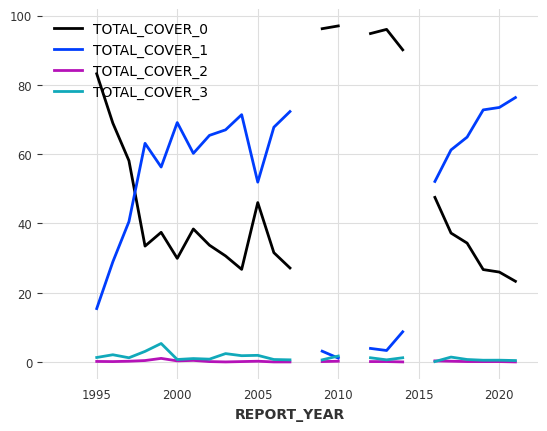

In [35]:
from darts import TimeSeries
df_list_extended_timeseries = TimeSeries.from_dataframe(df_list_extended[-1], time_col="REPORT_YEAR", value_cols=["ALGAE_COVER", "HARD_CORAL_COVER", "SOFT_CORAL_COVER", "OTHER_COVER"])
df_list_extended_timeseries.plot(label="TOTAL_COVER")

In [100]:
value_cols=["VISIT_NO", "SAMPLE_MONTH", "TEMPERATURE", "TEMPERATURE_YEAR_AVE", "MEDIAN_LIVE_CORAL", "MEDIAN_SOFT_CORAL", "MEDIAN_DEAD_CORAL", "MEAN_LIVE_CORAL", "MEAN_SOFT_CORAL", "MEAN_DEAD_CORAL", "TOTAL_COTS", "TOWS", "MEAN_COTS_PER_TOW", "TOTAL_TROUT", "MEAN_TROUT_PER_TOW", "ALGAE_COVER", "HARD_CORAL_COVER", "SOFT_CORAL_COVER", "OTHER_COVER"]

static_cols = ['SECTOR', 'SHELF', 'REEF_NAME', 'LATITUDE', 'LONGITUDE', 'SITE_LATITUDE', 'SITE_LONGITUDE']


group_series = TimeSeries.from_group_dataframe(combined_df, group_cols=["REEF_ID", "SITE_NO"], time_col="REPORT_YEAR", value_cols=value_cols, static_cols=static_cols)
group_series[0]

<TimeSeries (DataArray) (REPORT_YEAR: 34, component: 19, sample: 1)>
array([[[ 1.        ],
        [ 9.        ],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan]],

...

       [[34.        ],
        [10.        ],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan],
        [        nan]]])
Coordinates:
  * REPORT_YEAR  (REPORT_YEAR) int64 1993 1994 1995 1996 ... 2023 2024 2025 2026
  * component    (component) object 'VISIT_NO' 'SAMPLE_MONTH' ... 'OTHER_COVER'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  static_covariates REEF_ID  SITE_NO SECTOR SHELF      ...
    hierarchy:          None

In [109]:
from darts.utils.missing_values import missing_values_ratio
import statistics

missing_values_ratio_list = []
for i in range(len(group_series)):
    missing_values_ratio_list.append(missing_values_ratio(group_series[i]))

# print(missing_values_ratio_list)
print(statistics.mean(missing_values_ratio_list))
print(statistics.median(missing_values_ratio_list))

max_data = [0, 1]
for i, data in enumerate(group_series):
    if missing_values_ratio(data) < max_data[1]:
        max_data = [i, missing_values_ratio(data)]

print(max_data)
group_series[max_data[0]]

missing_values_ratio(group_series[54])

0.5681778704186208
0.6842105263157895
[54, 0.15789473684210525]


0.15789473684210525

In [77]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

from darts import TimeSeries
from darts.models import GaussianProcessFilter
from darts.utils import timeseries_generation as tg

c:\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
Number of components is larger than 10 (19). Plotting only the first 10 components.
Number of components is larger than 10 (19). Plotting only the first 10 components.


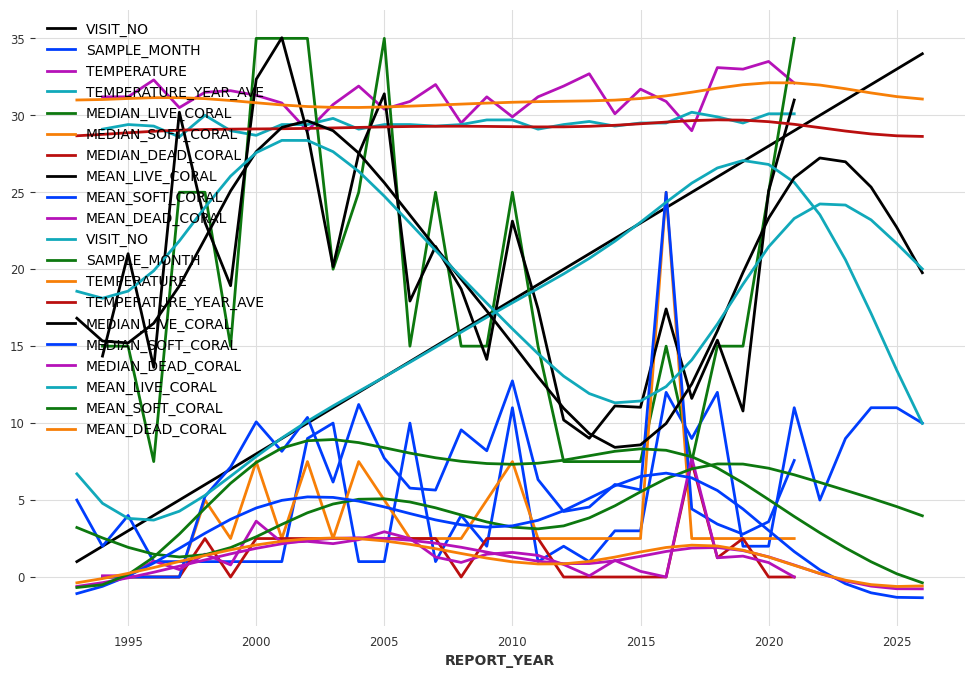

In [116]:
kernel = ExpSineSquared()
# kernel = RBF()

gpf = GaussianProcessFilter(
    kernel=kernel, alpha=0.1, n_restarts_optimizer=100
)
filtered_x = gpf.filter(group_series[54])

plt.figure(figsize=[12, 8])
group_series[54].plot()
# x_noise.plot(color="red", label="Noisy sine wave")
filtered_x.plot()
plt.legend()